In [15]:
import urllib.request
import urllib.parse
import json
import pandas as pd
import pprint

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
# 加工済みファイルのダウンロード
df = pd.read_pickle("complete_tokushima.pkl")
df["year"] = df.year.astype(int)
df["month"] = df.month.astype(int)
df["value"] = df.value.astype(float)

In [206]:
# 市区町村を英語の名前に変更
eng_pref = """Tokushima City
Naruto City
Komatsushima City
Anan City
Yoshinogawa City
Awa City
Mima City
Miyoshi City
Katsuura Town
Kamikatsu Town
Sanagochi Village
Ishii Town
Kamiyama Town
Naka Town
Mugi Town
Minami Town
Kaiyo Town
Matsushige Town
Kitajima Town
Aizumi Town
Itano Town
Kamiita Town
Tsurugi Town
Higashimiyoshi Town""".split("\n")
eng_pref = [e.lower().split()[0] for e in eng_pref]
jp_pref = df.pref_flg.unique()
pref_dict = dict(zip(jp_pref, eng_pref))
df["eng_pref"] = df.pref_flg.apply(lambda x: pref_dict[x])

In [207]:
# typesに男性と女性の数があるやつだけ取り出す
cntdata = df[df.types.str.contains("mn_cnt|wn_cnt")]

In [208]:
# 年月都市でまとめる
grouped_data = cntdata.groupby(["year","month","eng_pref"]).value.sum().reset_index().groupby(["year","eng_pref"]).value.mean().astype(int).reset_index()

In [209]:
show_data = grouped_data.pivot_table(index="year", columns="eng_pref", values="value", aggfunc="sum")\
                        .T.sort_values(2020, ascending=False).T

In [210]:
show_data

eng_pref,tokushima,anan,naruto,yoshinogawa,komatsushima,aizumi,awa,mima,ishii,miyoshi,...,kamiita,kaiyo,tsurugi,naka,minami,katsuura,kamiyama,mugi,sanagochi,kamikatsu
year,,,,,,,,,,,,,,,,,,,,,
2001,267722,78890,64548,46694,42990,30702,42237,36540,26098,36915,...,12962,12175,12961,11775,9169,6689,7664,5719,2986,2103
2002,267447,78856,64444,46519,42869,31150,41961,36309,26210,36230,...,13096,12075,12760,11546,9097,6632,7464,5637,2942,2059
2003,267467,78639,64277,46270,42678,31534,41653,36062,26257,35834,...,13116,11966,12557,11365,8966,6537,7272,5559,2882,2045
2004,267379,78340,63992,46078,42445,31788,41501,35671,26303,35202,...,13150,11895,12332,11201,8865,6462,7097,5457,2828,2018
2005,266846,78186,63525,45846,42184,32151,41229,35142,26211,34510,...,13141,11713,12046,10956,8702,6362,6925,5353,2807,1971
2006,267288,77748,62994,45508,41972,32509,40837,34246,26096,33541,...,13093,11341,11492,10457,8592,6214,6754,5314,2762,1903
2007,266631,77283,62632,45105,41686,32745,40482,33743,26008,32720,...,13049,11153,11237,10173,8433,6086,6513,5204,2721,1863
2008,265474,76810,62187,44691,41325,32865,40057,33337,25927,31935,...,13005,10925,10985,9942,8252,5954,6317,5070,2697,1825
2009,264676,76317,61734,44360,40927,32982,39614,32952,25863,31225,...,12928,10700,10741,9712,8025,5866,6137,4948,2658,1809


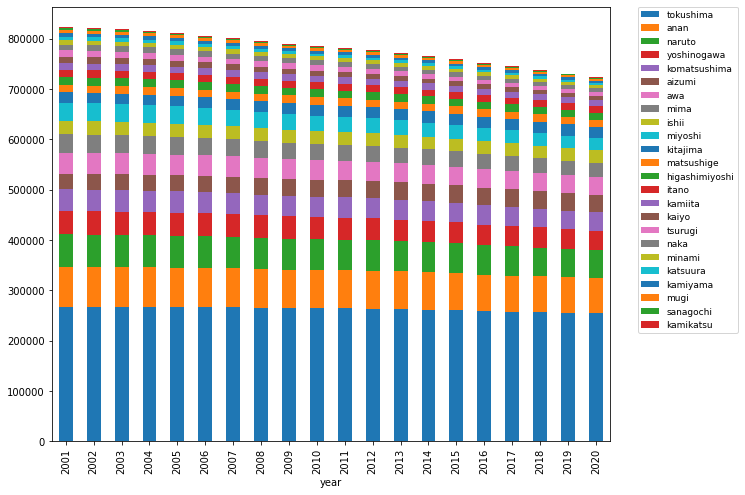

In [64]:
#　可視化
fig, ax = plt.subplots(figsize=(10, 8))

show_data = grouped_data.pivot_table(index="year", columns="eng_pref", values="value", aggfunc="sum")\
                        .T.sort_values(2020, ascending=False).T


show_data.plot(kind="bar", stacked=True, ax=ax)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=9)
plt.show()

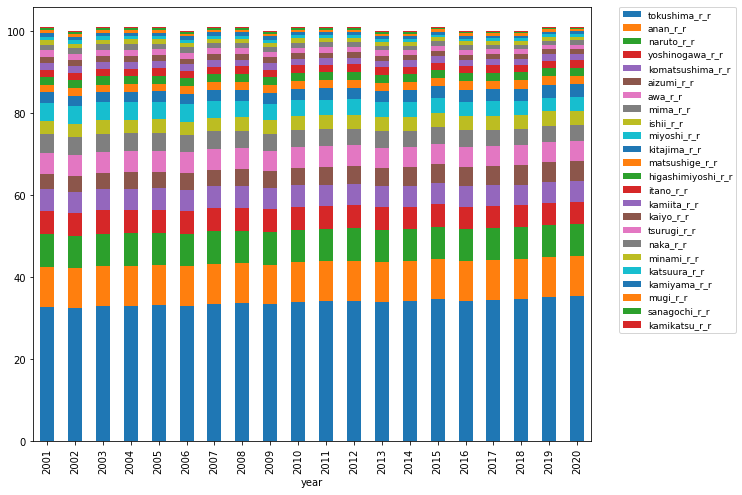

In [97]:
fig, ax = plt.subplots(figsize=(10, 8))

grouped_cnt = show_data.reset_index()

cols = grouped_cnt.columns[1:]
for idx in grouped_cnt.index:
    total_cnt = grouped_cnt.iloc[idx, 1:].sum().astype(int)
    for col in cols:
        grouped_cnt.loc[idx, col + "_r"] = round(grouped_cnt.loc[idx, col] / total_cnt * 100, 2)

show_data = grouped_cnt.set_index("year").iloc[:, len(cols):].T.sort_values(2020, ascending=False).T
show_data.plot(kind="bar", stacked=True, ax=ax)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=9)
plt.show()

# 生死による人口増減

In [164]:
cntdata = df[df.types.str.contains("natural")]
cntdata["diff"] = cntdata.apply(lambda x: x.value*-1 if "death" in x.types else x.value,axis=1)
cntdata["flg"] = cntdata.types.apply(lambda x:"death" if "death" in x else "birth")

birth_flg = cntdata.groupby(["year","eng_pref","flg"])["diff"].sum().reset_index()
birth_flg = birth_flg.pivot_table(index=["year","eng_pref"],columns="flg",values="diff",aggfunc="sum").reset_index()
birth_flg["diff"] = birth_flg.birth+birth_flg.death

/Users/kanaharafumitoshi/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/kanaharafumitoshi/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


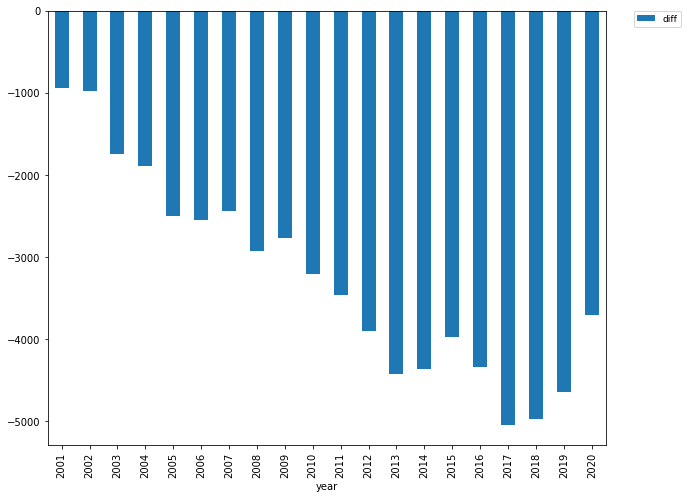

In [165]:
fig, ax = plt.subplots(figsize=(10, 8))

show_data = birth_flg.groupby("year")["diff"].sum()

show_data.plot(kind="bar", stacked=True, ax=ax)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=9)
plt.show()

# 社会動態による増減

In [191]:
cntdata2 = df[df.types.str.contains("social")]

In [192]:
cntdata2["diff"] = cntdata2.apply(lambda x: x.value*-1 if "out" in x.types else x.value,axis=1)

/Users/kanaharafumitoshi/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [193]:
cntdata2["flg"] = cntdata2.types.apply(lambda x:  "out" if "out" in x else "in")

/Users/kanaharafumitoshi/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [194]:
move_flg = cntdata2.groupby(["year","eng_pref","flg"])["diff"].sum().reset_index()

In [195]:
move_flg = move_flg.pivot_table(index=["year","eng_pref"],columns="flg",values="diff",aggfunc="sum").reset_index()

In [201]:
move_flg["diff"] = move_flg["in"]+move_flg["out"]

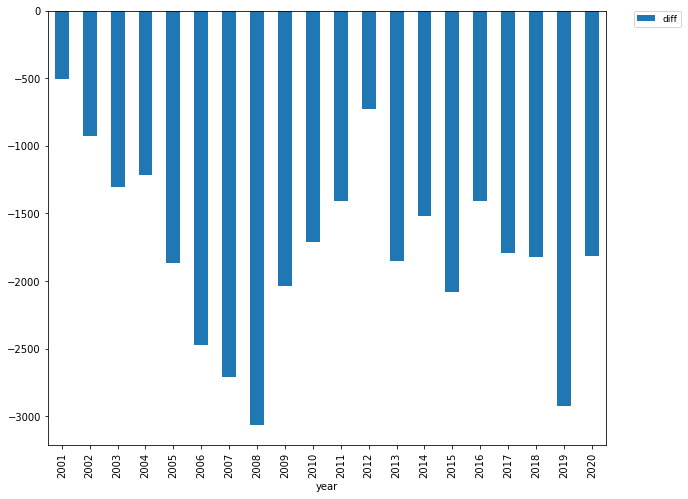

In [204]:
fig, ax = plt.subplots(figsize=(10, 8))

show_data = move_flg.groupby("year")["diff"].sum()

show_data.plot(kind="bar", stacked=True, ax=ax)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=9)
plt.show()